In [1]:
from experiments.datasets import load_or_create_dataset, TEST_USERS
from experiments._1_one_user_learn_neighbours.try_some_users import *
from os.path import join
import pickle

EXP_PATH = '/home/pablo/Proyectos/tesiscomp/experiments/_1_one_user_learn_neighbours'

/home/pablo/.virtualenvs/tesiscomp/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/pablo/.virtualenvs/tesiscomp/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Switching to API Credentials #2


In [6]:
models = {}
for user_id, username, tweet_count in TEST_USERS:
    models[user_id] = train_and_evaluate(user_id, username, tweet_count)

Loading dataset for user Gustavo Gomez (id 203030351)
Dataset loaded.
Size (#tweets): 174663
Dimension (#neighbours): 572
Training RandomForestClassifier
Detailed classification report:

Scores on training set.

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    121148
        1.0       1.00      0.95      0.97      1116

avg / total       1.00      1.00      1.00    122264

Scores on test set.

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     51950
        1.0       0.96      0.92      0.94       449

avg / total       1.00      1.00      1.00     52399

Loading dataset for user LAWRENCE JPD ARABIA  (id 228252737)
Dataset loaded.
Size (#tweets): 239699
Dimension (#neighbours): 625
Training RandomForestClassifier
Detailed classification report:

Scores on training set.

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    165760
        1.0

In [7]:
for user_id, clf in models.items():
    with open(join(EXP_PATH, 'rdf_%d.pickle' % user_id), 'wb') as f:
        pickle.dump(clf, f)

In [2]:
models = {}
for user_id, username, tweet_count in TEST_USERS:
    with open(join(EXP_PATH, 'rdf_%d.pickle' % user_id), 'rb') as f:
        models[user_id] = pickle.load(f)

In [3]:
from collections import defaultdict

def top10_counts(clf):
    """
        Dado un RDF de clasificación de tweets
        calcula para cada usuario del entorno
        la cantidad de árboles para los cuales
        este usuario aparece entre los 10 más importantes
        para el árbol ( según su *feature importance* )
    """
    counts = defaultdict(int)
    for i in range(10):
        for j, imp in sorted(enumerate(clf.estimators_[i].feature_importances_), key=lambda x:x[1])[-10:]:
            counts[j] += 1
    return counts

def avg_importances(clf):
    """
        Dado un RDF de clasificación de tweets
        calcula para cada usuario del entorno
        su *feature importance* media sobre
        todos los árboles del RDF
    """
    avg_imps = defaultdict(float)
    for i in range(10):
        for j, imp in sorted(enumerate(clf.estimators_[i].feature_importances_), key=lambda x:x[1])[-10:]:
            avg_imps[j] += imp
    
    return {j: s/10 for (j,s) in avg_imps.items()}

def avg_position(clf):
    """
        Dado un RDF de clasificación de tweets
        calcula para cada usuario del entorno
        su *feature importance* media sobre
        todos los árboles del RDF
    """
    avg_imps = defaultdict(float)
    for i in range(10):
        for j, imp in sorted(enumerate(clf.estimators_[i].feature_importances_), key=lambda x:x[1])[-10:]:
            avg_imps += imp
    
    return {j: s/10 for (j,s) in avg_imps.items()}

In [4]:
user_ids = [x[0] for x in TEST_USERS]

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
clf = models[user_ids[0]]

# Importancia media sobre todos los árboles

In [16]:
avgimp = avg_importances(clf)

In [6]:
plot_data = []
user_ids = [37226353, 203030351]
for uid in user_ids:
    clf = models[uid]
    avgimp = sorted(avg_importances(clf).values())
    nsteps = len(avgimp)
    step = 1.0 / nsteps
    x = np.arange(step, 1 + step, step)
    y = [sum(avgimp[:n]) for n in range(1, nsteps+1)]
    plot_data.extend((x, y, ''))

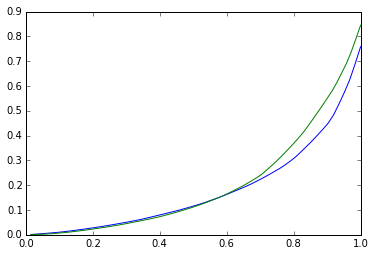

In [7]:
plt.plot(*plot_data)
plt.show()

# Importancia sobre el RDF

In [20]:
plot_data = []
user_ids = [37226353, 
            203030351,
            18623370
           ]
for uid in user_ids:
    clf = models[uid]
    imp = sorted(clf.feature_importances_)
    nsteps = len(imp)
    step = 1.0 / nsteps
    x = np.arange(step, 1 + step/2, step)
    y = [min(sum(imp[:n]), 1.0) for n in range(1, nsteps+1)]
    plot_data.extend((x, y, ''))

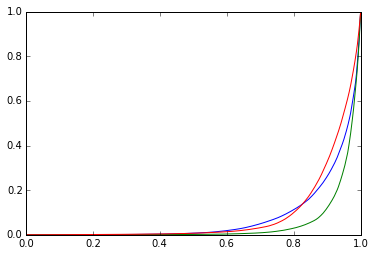

In [21]:
plt.plot(*plot_data)
plt.show()